In [4]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit

In [3]:
# def makeH_1_4(C, numem, spread, g, w, points):
#     P = 0.01
#     kappa = 10.
#     tau = 5.8
#     gamma = 1/tau
#     w_list = np.linspace(-20, 20, points)
   
#     we_list = np.random.normal(w, scale = spread/2, size = C*numem)

#     a = []
#     a.append(tensor(destroy(2), qeye(2), qeye(2), qeye(2), qeye(2)))
    
#     s = []
#     s.append(tensor(qeye(2), destroy(2), qeye(2), qeye(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), destroy(2), qeye(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), qeye(2), destroy(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), qeye(2), qeye(2), destroy(2)))
    
#     H = 0
#     c_ops = []
#     for i in range(len(a)):
#         H = H + w*a[i].dag() * a[i]
#         c_ops.append(np.sqrt(kappa) * a[i])
    
#     for j in range(len(s)):
#         H = H + we_list[j] * s[j].dag() * s[j]
#         c_ops.append(np.sqrt(gamma) * s[j])
        
    
#     H = H + g * (s[0].dag()*a[0] + a[0].dag() * s[0])
#     H = H + g * (s[1].dag()*a[0] + a[0].dag() * s[1])
#     H = H + g * (s[2].dag()*a[0] + a[0].dag() * s[2])
#     H = H + g * (s[3].dag()*a[0] + a[0].dag() * s[3])

#     c_ops.append(np.sqrt(P) * a[0].dag())
#     return H, w_list, c_ops, a, s

def makeH_2_4(C, numem, spread, g, J, w, points):
    P = 0.01
    kappa = 10.
    tau = 5.8
        
    gamma = 1/tau

    if J == 1:
        w_list = np.linspace(-15, -15, points)
    if J == 5:
        w_list = np.linspace(-40, 40, points)    
    if J == 10:
        w_list = np.linspace(-40, 40, points)
    else:
        w_list = np.linspace(-200, 200, points)

    
    we_list = np.random.normal(w, scale = spread/2, size = C*numem)
    # w_list = np.linspace(-4*gcalcs[0], 4*gcalcs[0], points)
    a = []
    a.append(tensor(tensor(destroy(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
    a.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(destroy(2), qeye(2), qeye(2))))
    
    s = []
    s.append(tensor(tensor(qeye(2), destroy(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), destroy(2)), tensor(qeye(2), qeye(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), destroy(2), qeye(2))))
    s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), destroy(2))))

    H = 0
    c_ops = []
    for i in range(len(a)):
        H = H + w*a[i].dag() * a[i]
        c_ops.append(np.sqrt(kappa) * a[i])
    
    for j in range(len(s)):
        H = H + we_list[j] * s[j].dag() * s[j]
        c_ops.append(np.sqrt(gamma) * s[j])
        
    
    H = H + g * (s[0].dag()*a[0] + a[0].dag() * s[0])
    H = H + g * (s[1].dag()*a[0] + a[0].dag() * s[1])
    H = H + g * (s[2].dag()*a[1] + a[1].dag() * s[2])
    H = H + g * (s[3].dag()*a[1] + a[1].dag() * s[3])
    
    H = H - J * (a[0].dag() * a[1] + a[1].dag() * a[0])
    
    c_ops.append(np.sqrt(P) * a[0].dag())
    return H, w_list, c_ops, a, s

In [16]:
def run_spec(C, numem, spread, g, J, w, points):
    plt.close('all')
    Jems = False
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H_spread, w_list, c_ops_spread, a_spread,s_spread = makeH_2_4(C, numem, spread, g, J, w, points)
        print('Hamiltonians made')

        
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread = makeH_1_4(C, numem, spread, g, w, points)

#         H, w_list, c_ops, a, s = makeH_1_4(C, numem, spread, g, w, points)
        print('Hamiltonians made')

#     spec = spectrum(H, w_list, c_ops, a[0].dag(), a[0])
#     spec = spec - min(spec)
#     spec = spec/max(spec)
#     print('No spread finished')

    spec_spread = spectrum(H_spread, w_list, c_ops_spread, a_spread[0].dag(), a_spread[0])
    spec_spread =spec_spread - min(spec_spread)
    spec_spread = spec_spread/max(spec_spread)
#     print('spread finished')
    
#     fig, cx = plt.subplots(1, 1, figsize=(12,9))
#     cx.plot(w_list, spec, linewidth=2, label = 'identical')
#     cx.plot(w_list, spec_spread, linewidth=2, label = '$\delta$ = {} GHz'.format(spread))
#     cx.plot(w_list, spec_spread, linewidth=2, label = '$\delta$ = {}GHz')

#     cx.tick_params(axis='both', which='major', labelsize=24)  

#     cx.set_xlabel('$\omega/2\pi$ (GHz)',fontsize = 32)
#     cx.set_ylabel('Transmission (arb. u.)',fontsize = 32)
#     cx.set_title(' Transmission Spectrum, ' + str(C) + ' Cavities, J = ' + str(J) + ', Emitter frequency spread = ' + str(spread))


#     cx.legend(fontsize = 24, loc = 'upper right')
#     if Jems == True:
# #         fig.savefig('paper sims/Jems_number cavs_' + str(C) + '_emsinside_' + str(4) + '.png')
# #         print('saved fig')
#         np.savetxt('specs/Jems_number cavs_' + str(C) + '_emsinside_' + str(4) + '.txt', np.transpose([w_list, spec_spread]))
#         print('saved data')

#         fig.savefig('specs/number cavs_' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(J)+ '_g' +str(g) + '.png')
#         print('saved fig')
    np.savetxt('specs/number cavs' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(J)+ '_g' +str(g) + '.txt', np.transpose([w_list, spec_spread]))
        
#         print('saved data')

def run_eigens(C, numem, spread, g, J, w, points):
    if C == 2:
#         H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)
        H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g, J, w, points)       
    if C ==1: 
        H_spread, w_list, c_ops_spread, a_spread, s_spread = makeH_1_4(C, numem, spread, g, w, points)

    eigens = H.eigenstates()
    return eigens, H, w_list, c_ops, a, s

In [17]:
C = 2
numem = 4
spread = 5
g = 5
J = 100
counts = 1
w = 0

In [18]:
eigens, H, w_list, c_ops, a, s = run_eigens(C, numem, 0, g, J, w, 100)

singlevals = []
singlevects = []
singleindex = []
singles = []

for ind in range(0,len(eigens[1])-1):
    npsi = a[0].dag()*a[0]*eigens[1][ind] + a[1].dag()*a[1] * eigens[1][ind] + s[0].dag()*s[0]*eigens[1][ind] + s[1].dag()*s[1]*eigens[1][ind] + s[2].dag()*s[2]*eigens[1][ind] + s[3].dag()*s[3]*eigens[1][ind]

    if npsi == eigens[1][ind]:
        singlevals.append(np.real(eigens[0][ind]))
        singleindex.append(ind)
        state = []
        for j in range(0,63):
            state.append(eigens[1][ind][j][0][0])
        singles.append(np.real(np.transpose([eigens[0][ind], *state])))
#         if 
#         singlevects = np.array(singlestates)

np.savetxt('diffs/J='+ str(J) + '/spread=0_all.txt', np.transpose([eigens[0]]), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')

np.savetxt('diffs/J='+ str(J) + '/spread=0_singlestates.txt', np.transpose(singles), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')


for i in range(counts):
    eigens, H, w_list, c_ops, a, s = run_eigens(C, numem, spread, g, J, w, 100)
    
    singlevals = []
    singlevects = []
    singleindex = []
    singles = []
    for ind in range(0,len(eigens[1])-1):
        npsi = a[0].dag()*a[0]*eigens[1][ind] + a[1].dag()*a[1] * eigens[1][ind] + s[0].dag()*s[0]*eigens[1][ind] + s[1].dag()*s[1]*eigens[1][ind] + s[2].dag()*s[2]*eigens[1][ind] + s[3].dag()*s[3]*eigens[1][ind]

        if npsi == eigens[1][ind]:
            singlevals.append(np.real(eigens[0][ind]))
            singleindex.append(ind)
            state = []
            for j in range(0,64):
                state.append(eigens[1][ind][j][0][0])
            singles.append(np.real(np.transpose([eigens[0][ind], *state])))
#         singlevects = np.array(singlestates)
    if len(eigens) == 5:
        run_spec(C, numem, spread, g, J, w, points)
    
            
    np.savetxt('diffs/J='+ str(J) + '/spread=' + str(spread) + '_all_' + str(i) + '.txt', np.transpose([eigens[0]]), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')
    
    np.savetxt('diffs/J='+ str(J) + '/spread=' + str(spread) + '_singlestates_' + str(i)+'.txt', np.transpose(singles), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')
    if i % 10 ==0:
        print(i)
        
# eigenvalues = np.loadtxt('diffs/J='+ str(J) + '/spread=' + str(spread) + '_singlestates_' + str(i) + '.txt', unpack = True, max_rows = 1)
# eigenvects = np.loadtxt('diffs/J='+ str(J) + '/spread=' + str(spread) + '_singlestates_' + str(i)+'.txt', unpack = True)

(array([-107.92675902, -106.54769003, -105.89072376, -105.27397603,
       -104.51684975, -103.86513889, -103.25983418, -103.15080254,
       -101.85715303, -101.7638549 , -101.13826047, -100.50292582,
        -99.75432787,  -99.08967614,  -98.50759641,  -97.09832161,
         -7.40774636,   -7.39735811,   -6.17759935,   -6.02825842,
         -5.50163393,   -5.40278006,   -4.75780508,   -4.58266796,
         -4.28200083,   -4.02386301,   -3.39944707,   -3.32122877,
         -2.81651474,   -2.64608942,   -2.63943131,   -2.56504456,
         -1.45881845,   -1.3844317 ,   -1.37777359,   -1.20734828,
         -0.70263424,   -0.62441594,    0.        ,    0.25813782,
          0.55880495,    0.73394207,    1.37891705,    1.47777092,
          2.00439541,    2.15373633,    3.3734951 ,    3.38388334,
         93.0744586 ,   94.48373339,   95.06581313,   95.73046485,
         96.47906281,   97.11439746,   97.73999189,   97.83329002,
         99.12693953,   99.23597117,   99.84127588,  100.4929

In [209]:
nospr = np.loadtxt('diffs/J='+ str(J) + '/spread=5_singlestates_0.txt', unpack = True, max_rows = 1)
diff = []
e1 = []
e2 = []
e3 = []
e4 = []
e5 = []
e0 = []
for i in range(0,100):
    eigenvalues = np.loadtxt('diffs/J='+ str(J) + '/spread=5_singlestates_' + str(i) + '.txt', unpack = True, max_rows = 1)
    e0.append(eigenvalues[0])
    e1.append(eigenvalues[1])
    e2.append(eigenvalues[2])
    e3.append(eigenvalues[3])
    e4.append(eigenvalues[4])
    if len(eigenvalues) == 6:
        e5.append(eigenvalues[5])

dif0 = np.mean((e0 - eigenvalues[0])**2)
dif1 = np.mean((e1 - eigenvalues[1])**2)
dif2 = np.mean((e2 - eigenvalues[2])**2)
dif3 = np.mean((e3 - eigenvalues[3])**2)
dif4 = np.mean((e4 - eigenvalues[4])**2)
dif5 = np.mean((e5 - eigenvalues[5])**2)
print(dif0, dif1, dif2, dif3, dif4, dif5)

4.605340700000734e-05 3.888156650675944 3.155515529887526 5.346273868457622 4.97605881218753 3.7118789247314326e-05


In [11]:
for i in range(counts):
    eigens = run_eigens(C, numem, 0, g, J, w, 100)
    
    singlevals = []
    singlevects = []
    singleindex = []
    singles = []
    for ind in range(0,len(eigens[1])-1):
        npsi = a[0].dag()*a[0]*eigens[1][ind] + a[1].dag()*a[1] * eigens[1][ind] + s[0].dag()*s[0]*eigens[1][ind] + s[1].dag()*s[1]*eigens[1][ind] + s[2].dag()*s[2]*eigens[1][ind] + s[3].dag()*s[3]*eigens[1][ind]

        if npsi == eigens[1][ind]:
            singlevals.append(eigens[0][ind])
            singleindex.append(ind)
            state = []
            for j in range(0,63):
                state.append(eigens[1][ind][j][0][0])
            singles.append(np.real(np.transpose([eigens[0][ind], *state])))
#         singlevects = np.array(singlestates)

            
    np.savetxt('diffs/J='+ str(J) + '_spread=' + str(spread) + '_all_' + str(i) + '.txt', np.transpose([eigens[0]]), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')
    
    np.savetxt('diffs/J='+ str(J) + '_spread=' + str(spread) + '_singlestates_' + str(i)+'.txt', np.transpose(singles), header = 'Cavities = ' + str(C) + 'Total Emitters = ' + str(numem) + 'g = ' + str(g), fmt = '%.8g')
    if i % 10 ==0:
        print(i)

SyntaxError: invalid syntax (<ipython-input-11-9428222109e3>, line 19)

In [20]:
##params
g = [5]
kappa = [10]
j = [1]
C = 2
numem = 4
spread = 0
w = 0
points = 500

In [ ]:
makeH_2_4()

In [21]:
for i in j:
    H, w_list, c_ops, a, s = makeH_2_4(C, numem, spread, g[0], i, w, points)
#     print('Hamiltonians made')
    eigens = H.eigenstates()
    np.savetxt('eigens/' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(i)+ '_g' +str(g[0]) + '.txt', np.transpose([eigens[0], eigens[0]]))

#     try:
#         print('J: ' + str(i) + ' Starting now')
#         run(C=C, numem=numem, spread=spread, g = g[0], J = i, w=w, points= points)
#         print('J: ' + str(i) + ' Finished and saved')
#     except OSError:
#         print('Memory error, trying again')
#         run(C=C, numem=numem, spread=spread, g = g[0], J = i, w=w, points= points)
#         print('J: ' + str(i) + ' Finished and saved')
        
#     fig, cx = plt.subplots(1, 1, figsize=(12,9))
    #     cx.plot(w_list, spec, linewidth=2, label = 'identical')
#     cx.plot(eigens[0], linewidth=2, label = 'Eigenvalues')
#     print('eigenvalues: ', eigens[0])
    singlestates = []
    singlevects = []
    singleindex = []
    for ind in range(len(eigens[1])):
        npsi = a[0].dag()*a[0]*eigens[1][ind] + a[1].dag()*a[1] * eigens[1][ind] + s[0].dag()*s[0]*eigens[1][ind] + s[1].dag()*s[1]*eigens[1][ind] + s[2].dag()*s[2]*eigens[1][ind] + s[3].dag()*s[3]*eigens[1][ind]
        if npsi == eigens[1][ind]:
            singlestates.append(eigens[0][ind])
            singleindex.append(ind)
            singlevects.append(npsi)
#     cx.plot(singleindex, singlestates, 'ro', linewidth=2, label = 'Single State Eigenvalues')
#     cx.legend()

#     cx.tick_params(axis='both', which='major', labelsize=24)  

#     cx.set_xlabel('Eigenvalue number, 0 = lowest energy',fontsize = 32)
#     cx.set_ylabel('Energy Eigenvalue',fontsize = 32)
#     cx.set_title(' Energy Eigenvalues, ' + str(C) + ' Cavities, J = ' + str(i) + ', Emitter frequency spread = ' + str(spread))
#     fig.savefig('eigens/' + str(C) + '_emsinside' + str(4) + '_spread' +str(spread) + '_J' +str(i)+ '_g' +str(g[0]) + '.png')


In [455]:
def lor(x, amp, mu, sigma):
    z =  (x - mu)/(sigma/2)
    lor = amp/(1 + z**2)
    return lor

def FWHM(X,Y):
    vals = []
    fig, cx = plt.subplots(1,1)
    maxinds = argrelextrema(Y, np.greater, order = 10)
    halfmaxes = Y[maxinds]/2
    current_half_max_idx = 0
    
    cx.plot(X, Y)
#     for i in range(1, len(Y)):
#         if Y[i-1] < halfmaxes[current_half_max_idx] and Y[i] >= halfmaxes[current_half_max_idx]:
#             start_index = i
        
#         if Y[i-1] >= halfmaxes[current_half_max_idx] and Y[i] < halfmaxes[current_half_max_idx]:
#             vals.append(X[i] - X[start_index])
#             cx.plot(X[i], Y[i], 'ro')
#             cx.plot(X[start_index], Y[start_index], 'bo')
#             start_index = None
#             current_half_max_idx += 1
#             if (current_half_max_idx >= len(halfmaxes)):
#                 break
#     return vals

    right_idx = 0
    for i in halfmaxes:
        d = np.sign(i - Y[0:-1]) - np.sign(i - Y[1:])
        left_idx = np.where(d > 0)[0][0] + right_idx
        right_idx += np.where(d < 0)[0][0] 
        cx.plot(X, Y)
        cx.plot(X[left_idx], Y[left_idx], 'bo')
        cx.plot(X[right_idx], Y[right_idx], 'ro')
        val = X[right_idx] - X[left_idx]
        params = curve_fit(lor, X[:500], Y[:500], p0 = [Y[maxinds[0][0]], X[maxinds[0][0]], val])
        cx.plot(X, lor(X, *params[0]))
        
    
        vals.append(val) #return the difference (full width)%%!

    return vals

IndexError: index 560 is out of bounds for axis 0 with size 500

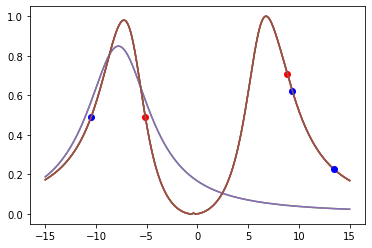

In [456]:
# spread = [0, 5]
spread = [5]
J = [1]
# J = [1, 5, 10, 100]
spreadvals = []
nospreadvals = []
for i in spread:
    for j in J: 
        X,Y = np.loadtxt('specs/number cavs2_emsinside4_spread' + str(i) + '_J'+ str(j)+'_g5.txt', unpack = True)
        vals = FWHM(X,Y)
        if i==0:
            nospreadvals.append(vals)
        else:
            spreadvals.append(vals)

(array([129, 243, 362], dtype=int64),)
[0.9800873253794354, -7.244488977955912, 5.350701402805612]
[ 0.8488755  -7.78972222  7.68369874]


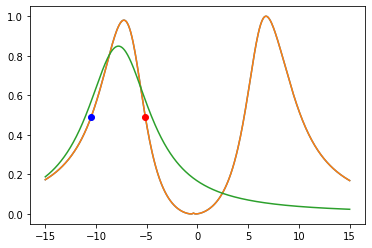

In [466]:
vals = []
fig, cx = plt.subplots(1,1)
maxinds = argrelextrema(Y, np.greater, order = 10)
halfmax = Y[maxinds]/2
current_half_max_idx = 0
print(maxinds)

cx.plot(X, Y)
#     for i in range(1, len(Y)):
#         if Y[i-1] < halfmaxes[current_half_max_idx] and Y[i] >= halfmaxes[current_half_max_idx]:
#             start_index = i

#         if Y[i-1] >= halfmaxes[current_half_max_idx] and Y[i] < halfmaxes[current_half_max_idx]:
#             vals.append(X[i] - X[start_index])
#             cx.plot(X[i], Y[i], 'ro')
#             cx.plot(X[start_index], Y[start_index], 'bo')
#             start_index = None
#             current_half_max_idx += 1
#             if (current_half_max_idx >= len(halfmaxes)):
#                 break
#     return vals

right_idx = 0

d = np.sign(halfmax[0] - Y[0:-1]) - np.sign(halfmax[0] - Y[1:])
left_idx = np.where(d > 0)[0][0] + right_idx
right_idx += np.where(d < 0)[0][0] 
cx.plot(X, Y)
cx.plot(X[left_idx], Y[left_idx], 'bo')
cx.plot(X[right_idx], Y[right_idx], 'ro')
val = X[right_idx] - X[left_idx]
print([Y[129], X[129], val])
params = curve_fit(lor, X[:500], Y[:500], p0 = [Y[129], X[129], val])
print(params[0])
cx.plot(X, lor(X, *params[0]))

In [380]:
nospreadvals

[[5.470941883767535, -9.739478957915832],
 [11.382765531062127,
  -6.7334669338677315,
  11.54308617234469,
  -6.7334669338677315],
 [8.176352705410824,
  -6.0921843687374775,
  9.138276553106213,
  -6.573146292585172],
 [10.420841683366746, -64.12825651302606, 10.420841683366731]]

In [264]:
left_idx = np.where(d > 0)[0]
print(left_idx)
right_idx = np.where(d < 0)[-1]
print(right_idx)

[338]
[339]


In [283]:
from scipy.signal import argrelextrema

In [313]:
maxes = argrelextrema(Y, np.greater, order = 10)


array([ 62. , 127. , 187.5])

In [314]:
Y[maxes]

array([1.        , 0.0192829 , 0.99948374])

In [333]:
X[right_idx] - X[left_idx]

array([33.66733467, 19.23847695, 15.23046092, 26.45290581])

In [441]:
    maxinds = argrelextrema(Y, np.greater, order = 10)
    maxinds[0][0]

129

In [342]:
i = .5
d = np.sign(i - Y[0:-1]) - np.sign(i - Y[1:])
#plot(X[0:len(d)],d) #if you are interested
        #find the left and right most indexes
left_idx = np.where(d > 0)[0]
right_idx = np.where(d < 0)[0]


In [343]:
left_idx

array([117, 368], dtype=int64)

In [344]:
right_idx

array([130, 381], dtype=int64)

In [341]:
Y

array([4.39390922e-03, 4.45414804e-03, 4.51572098e-03, 4.57867053e-03,
       4.64304033e-03, 4.70887536e-03, 4.77622197e-03, 4.84512816e-03,
       4.91564373e-03, 4.98782048e-03, 5.06171238e-03, 5.13737571e-03,
       5.21486926e-03, 5.29425439e-03, 5.37559525e-03, 5.45895887e-03,
       5.54441530e-03, 5.63203784e-03, 5.72190310e-03, 5.81409126e-03,
       5.90868624e-03, 6.00577587e-03, 6.10545216e-03, 6.20781150e-03,
       6.31295492e-03, 6.42098836e-03, 6.53202297e-03, 6.64617539e-03,
       6.76356812e-03, 6.88432985e-03, 7.00859584e-03, 7.13650837e-03,
       7.26821711e-03, 7.40387967e-03, 7.54366207e-03, 7.68773927e-03,
       7.83629583e-03, 7.98952647e-03, 8.14763683e-03, 8.31084415e-03,
       8.47937813e-03, 8.65348176e-03, 8.83341230e-03, 9.01944227e-03,
       9.21186058e-03, 9.41097373e-03, 9.61710711e-03, 9.83060646e-03,
       1.00518394e-02, 1.02811971e-02, 1.05190961e-02, 1.07659806e-02,
       1.10223243e-02, 1.12886329e-02, 1.15654470e-02, 1.18533450e-02,
      

In [2]:
destroy(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [13]:
# def makeH_1_4(C, numem, spread, g, w, points):
#     P = 0.01
#     kappa = 10.
#     tau = 5.8
#     gamma = 1/tau
#     w_list = np.linspace(-20, 20, points)
   
#     we_list = np.random.normal(w, scale = spread/2, size = C*numem)

#     a = []
#     a.append(tensor(destroy(2), qeye(2), qeye(2), qeye(2), qeye(2)))
    
#     s = []
#     s.append(tensor(qeye(2), destroy(2), qeye(2), qeye(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), destroy(2), qeye(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), qeye(2), destroy(2), qeye(2)))
#     s.append(tensor(qeye(2), qeye(2), qeye(2), qeye(2), destroy(2)))
    
#     H = 0
#     c_ops = []
#     for i in range(len(a)):
#         H = H + w*a[i].dag() * a[i]
#         c_ops.append(np.sqrt(kappa) * a[i])
    
#     for j in range(len(s)):
#         H = H + we_list[j] * s[j].dag() * s[j]
#         c_ops.append(np.sqrt(gamma) * s[j])
        
    
#     H = H + g * (s[0].dag()*a[0] + a[0].dag() * s[0])
#     H = H + g * (s[1].dag()*a[0] + a[0].dag() * s[1])
#     H = H + g * (s[2].dag()*a[0] + a[0].dag() * s[2])
#     H = H + g * (s[3].dag()*a[0] + a[0].dag() * s[3])

#     c_ops.append(np.sqrt(P) * a[0].dag())
#     return H, w_list, c_ops, a, s


P = 0.01
kappa = 10.
tau = 5.8
J = 1
points = 1000
gamma = 1/tau
w = 0
spread = 0
C = 2
numem = 2
g = 5

if J == 1:
    w_list = np.linspace(-15, -15, points)
if J == 5:
    w_list = np.linspace(-40, 40, points)    
if J == 10:
    w_list = np.linspace(-40, 40, points)
else:
    w_list = np.linspace(-200, 200, points)


we_list = np.random.normal(w, scale = spread/2, size = C*numem)
# w_list = np.linspace(-4*gcalcs[0], 4*gcalcs[0], points)
a = []
a.append(tensor(tensor(destroy(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
a.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(destroy(2), qeye(2), qeye(2))))

s = []
s.append(tensor(tensor(qeye(2), destroy(2), qeye(2)), tensor(qeye(2), qeye(2), qeye(2))))
s.append(tensor(tensor(qeye(2), qeye(2), destroy(2)), tensor(qeye(2), qeye(2), qeye(2))))
s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), destroy(2), qeye(2))))
s.append(tensor(tensor(qeye(2), qeye(2), qeye(2)), tensor(qeye(2), qeye(2), destroy(2))))

H = 0
c_ops = []
for i in range(len(a)):
    H = H + w*a[i].dag() * a[i]
    c_ops.append(np.sqrt(kappa) * a[i])

for j in range(len(s)):
    H = H + we_list[j] * s[j].dag() * s[j]
    c_ops.append(np.sqrt(gamma) * s[j])


H = H + g * (s[0].dag()*a[0] + a[0].dag() * s[0])
H = H + g * (s[1].dag()*a[0] + a[0].dag() * s[1])
H = H + g * (s[2].dag()*a[1] + a[1].dag() * s[2])
H = H + g * (s[3].dag()*a[1] + a[1].dag() * s[3])

H = H - J * (a[0].dag() * a[1] + a[1].dag() * a[0])

c_ops.append(np.sqrt(P) * a[0].dag())


64

In [41]:
tensor(qeye(2), qeye(2), destroy(2))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [43]:
tensor(destroy(2), qeye(2), qeye(2))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]